<a href="https://colab.research.google.com/github/RuchiraSachinthana/Enose/blob/main/enose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
# from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
#importing dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
enose_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/enosedata.csv')

In [ ]:
enose_data.head(10)

,MQ2,MQ7,MQ135,MQ3,Temperature,Humidity,output
0,3297,1839,1179,4361,27,73,1
1,3301,1830,1167,4597,27,73,1
2,3300,1820,1155,4739,27,73,1
3,3305,1810,1142,4837,27,73,1
4,3310,1801,1128,4921,27,73,1
5,3317,1794,1116,4976,27,73,1
6,3321,1787,1105,5008,27,73,1
7,3326,1781,1094,5018,27,73,1
8,3327,1776,1084,5028,27,73,1
9,3329,1771,1075,5029,27,73,1


In [ ]:
enose_data.shape

(489, 7)

In [ ]:
enose_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   MQ2          489 non-null    int64
 1   MQ7          489 non-null    int64
 2   MQ135        489 non-null    int64
 3   MQ3          489 non-null    int64
 4   Temperature  489 non-null    int64
 5   Humidity     489 non-null    int64
 6   output       489 non-null    int64
dtypes: int64(7)
memory usage: 26.9 KB


In [ ]:
enose_data.describe()

,MQ2,MQ7,MQ135,MQ3,Temperature,Humidity,output
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,4603.979550,3727.854806,1005.838446,2148.341513,31.717791,59.002045,0.306748
std,1052.843406,1396.587711,39.393305,1462.324846,2.841097,8.780917,0.461616
min,2878.000000,1662.000000,975.000000,975.000000,16.000000,51.000000,0.000000
25%,3289.000000,1721.000000,987.000000,1065.000000,28.000000,53.000000,0.000000
50%,4991.000000,4443.000000,994.000000,1197.000000,33.000000,55.000000,0.000000
75%,5489.000000,4852.000000,1002.000000,3884.000000,34.000000,68.000000,1.000000
max,6223.000000,5791.000000,1189.000000,5029.000000,34.000000,154.000000,1.000000


In [ ]:
enose_data['output'].value_counts()

0    339
1    150
Name: output, dtype: int64

In [ ]:
enose_data.groupby("output").mean()

,MQ2,MQ7,MQ135,MQ3,Temperature,Humidity
output,,,,,,
0,5267.589971,4625.882006,1004.604720,1196.752212,33.501475,54.156342
1,3104.220000,1698.313333,1008.626667,4298.933333,27.686667,69.953333


In [ ]:
X = enose_data.drop(columns = 'output',axis=1)
Y = enose_data['output']

In [ ]:
print(X)

      MQ2   MQ7  MQ135   MQ3  Temperature  Humidity
0    3297  1839   1179  4361           27        73
1    3301  1830   1167  4597           27        73
2    3300  1820   1155  4739           27        73
3    3305  1810   1142  4837           27        73
4    3310  1801   1128  4921           27        73
..    ...   ...    ...   ...          ...       ...
484  4761  4028    978  1498           34        51
485  4760  4029    978  1496           34        51
486  4763  4033    978  1493           34        51
487  4783  4061    977  1473           34        51
488  4787  4064    977  1472           34        51

[489 rows x 6 columns]


In [ ]:
#Standardization data
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardize_data = scaler.transform(X)

In [ ]:
print(standardize_data.shape)

(489, 6)


In [ ]:
print(standardize_data)

[[-1.24265202 -1.35386349  4.40021177  1.51465962 -1.66225302  1.59576611]
 [-1.23884889 -1.36031437  4.09527953  1.67621174 -1.66225302  1.59576611]
 [-1.23979967 -1.36748201  3.79034729  1.77341683 -1.66225302  1.59576611]
 ...
 [ 0.15119371  0.21871715 -0.70740331 -0.44860937  0.80410679 -0.91223269]
 [ 0.17020934  0.23878655 -0.73281433 -0.46230023  0.80410679 -0.91223269]
 [ 0.17401246  0.24093684 -0.73281433 -0.46298477  0.80410679 -0.91223269]]


In [ ]:
X =standardize_data

In [ ]:
print(X)

[[-1.24265202 -1.35386349  4.40021177  1.51465962 -1.66225302  1.59576611]
 [-1.23884889 -1.36031437  4.09527953  1.67621174 -1.66225302  1.59576611]
 [-1.23979967 -1.36748201  3.79034729  1.77341683 -1.66225302  1.59576611]
 ...
 [ 0.15119371  0.21871715 -0.70740331 -0.44860937  0.80410679 -0.91223269]
 [ 0.17020934  0.23878655 -0.73281433 -0.46230023  0.80410679 -0.91223269]
 [ 0.17401246  0.24093684 -0.73281433 -0.46298477  0.80410679 -0.91223269]]


In [ ]:
X_train ,X_test, Y_train ,Y_test = train_test_split(X,Y,test_size = 0.2 ,stratify=Y,random_state=2)

In [ ]:
classifier = svm.SVC(kernel ='linear')

In [ ]:
classifier.fit(X_train, Y_train )

SVC(kernel='linear')

In [ ]:
#model evaluation
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print(training_data_accuracy)

1.0


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print(test_data_accuracy)

1.0


In [ ]:
input_data = (3333,1752,1042,5008,27,73)
input_data_numpy =np.asarray(input_data)
input_data_reshaped = input_data_numpy.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = classifier.predict(std_data)
print(prediction)
if prediction == 0:
  print ("non riped")

else:
  print("riped")

[1]
riped


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (5176,4599,993,1124,33,56)
input_data_numpy =np.asarray(input_data)
input_data_reshaped = input_data_numpy.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = classifier.predict(std_data)
print(prediction)
if prediction == 0:
  print ("non riped")

else:
  print("riped")

[0]
non riped


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (4644,3877,999,1713,34,54)
input_data_numpy =np.asarray(input_data)
input_data_reshaped = input_data_numpy.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = classifier.predict(std_data)
print(prediction)
if prediction == 0:
  print ("non riped")

else:
  print("riped")

[0]
non riped


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (2903,1665,989,3777,28,67)
input_data_numpy =np.asarray(input_data)
input_data_reshaped = input_data_numpy.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = classifier.predict(std_data)
print(prediction)
if prediction == 0:
  print ("non riped")

else:
  print("riped")

[1]
riped


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## without standardization

In [ ]:
X_train ,X_test, Y_train ,Y_test = train_test_split(X,Y,test_size = 0.2 ,stratify=Y,random_state=2)

In [ ]:
classifier = svm.SVC(kernel ='linear')

In [ ]:
classifier.fit(X_train, Y_train )

SVC(kernel='linear')

In [ ]:
#model evaluation
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print(training_data_accuracy)

1.0


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print(test_data_accuracy)

1.0


In [ ]:
input_data = (3333,1752,1042,5008,27,73)
input_data_numpy =np.asarray(input_data)
input_data_reshaped = input_data_numpy.reshape(1,-1)
# std_data = scaler.transform(input_data_reshaped)
prediction = classifier.predict(input_data_reshaped)
print(prediction)
if prediction == 0:
  print ("non riped")

else:
  print("riped")

[0]
non riped


without standardization can not get correct result

In [ ]:
input_data = (3333,1752,1042,5008,27,73)
input_data_numpy =np.asarray(input_data)
input_data_reshaped = input_data_numpy.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = classifier.predict(std_data)
print(prediction)
if prediction == 0:
  print ("non riped")

else:
  print("riped")

[1]
riped


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Correlation**


1.   *positive correlation*- when one variable is increased with another variable also increased we can call it a positive correlation
2.   *negative correlation* - when one variable is decreased and another variable increased we can call it a negative correlation

In [ ]:
correlation = enose_data.corr()

<Axes: >

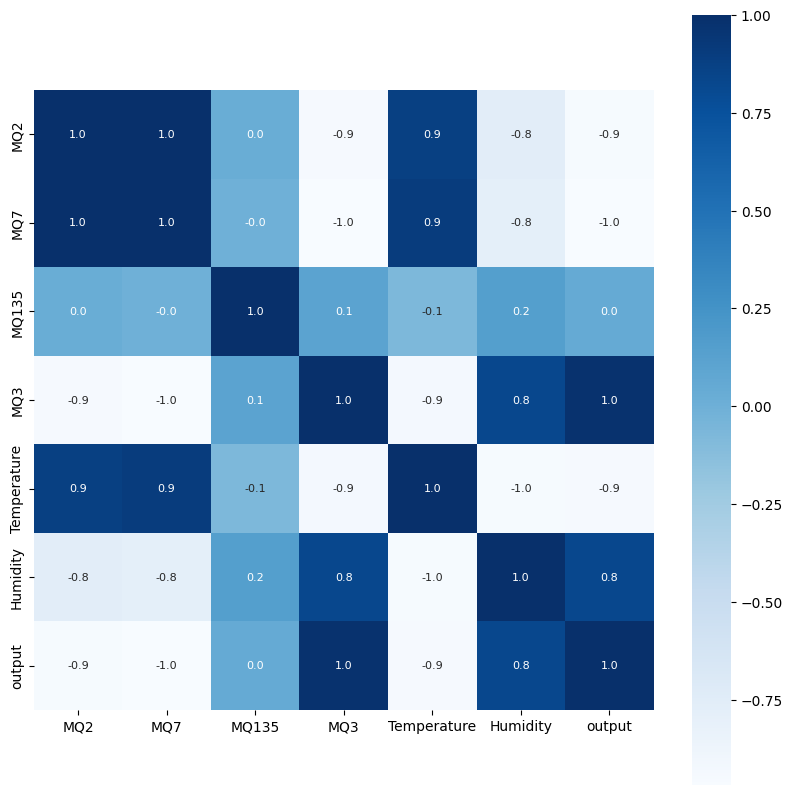

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square = True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')